In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

Using TensorFlow backend.


In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# Simplest Neural Network (for testing)

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train.as_matrix(), y_train, epochs=2)

Epoch 1/2
190820/190820 [==============================] - 8s - loss: 0.1619 - acc: 0.9899     
Epoch 2/2
190820/190820 [==============================] - 7s - loss: 0.0290 - acc: 0.9982     


In [9]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

Loss:  [0.025553031188913698, 0.99841467436985964]


In [10]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


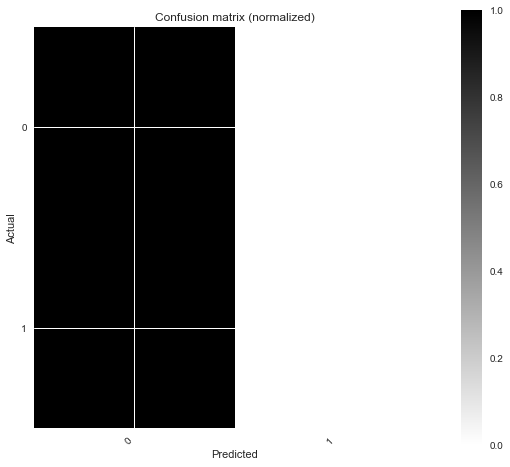

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: RuntimeWarning: overflow encountered in longlong_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\stats.py:61: RuntimeWarning: overflow encountered in longlong_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.99841467437
95% CI: (0.99813896508104838, 0.99865884550190664)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93838         149
N: Condition negative                         149       93838
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93838           0
TN: True Negative                               0       93838
FP: False Positive                            149           0
FN: False Negative                              0         149
TPR: (

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [11]:
from pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

# Neural Network after Oversampling, Scaling, and PCA (10 components)

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X, target=y)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

array([[-2.30992645,  0.09807132,  0.33138878, ..., -1.57652544,
        -0.05092494,  0.61690427],
       [-2.21267447,  0.48987499,  0.31129274, ..., -0.8267753 ,
        -0.46477516,  0.72688474],
       [-2.41511929, -0.24604884, -0.12638872, ..., -1.90968032,
        -1.25395776,  0.34080421],
       ..., 
       [-0.91337448, -0.46969225, -0.37025083, ...,  0.32562987,
        -1.06074331,  1.00873337],
       [ 0.87287442,  1.07252823,  1.18088773, ...,  1.20198112,
        -1.24952608, -1.42027391],
       [ 0.95261538,  1.00739765, -0.16785586, ..., -0.03768009,
         1.2861043 , -0.09915241]])

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2.as_matrix(), test_size=0.33, random_state=42)

In [14]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='tanh')) 
model2.add(Dense(27, activation='tanh'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(2, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 27)                297       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                448       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.fit(X2_train, y2_train, epochs=2)

Epoch 1/2
380982/380982 [==============================] - 22s - loss: 0.0404 - acc: 0.9925    
Epoch 2/2
380982/380982 [==============================] - 20s - loss: 0.0083 - acc: 0.9974    


In [16]:
print("Loss: ", model2.evaluate(X2_test, y2_test, verbose=0))


Loss:  [0.010453229904587679, 0.99656804229195084]


In [17]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y2_test)

In [18]:
np.setdiff1d(y2_predicted, y2_correct)

array([], dtype=float32)

In [19]:
false_neg = 0
false_pos = 0
incorrect = 0
total = len(y2_test)
for i in range(len(y2_test)):
    if y2_predicted[i] != y2_correct[i]:
        incorrect += 1
        if y2_correct[i] == 1 and y2_predicted[i] == 0:
            false_neg += 1
        else:
            false_pos += 1
        #print('Wrongly predicted: ', y2_predicted[i])
inaccuracy = incorrect / total
print('Inaccuracy:', inaccuracy)
print('Accuracy:', 1 - inaccuracy)
print('False negative rate:', false_neg/incorrect)
print('False positive rate:', false_pos / incorrect )
print('false negatives/total:', false_neg/total)

Inaccuracy: 0.003431957708049113
Accuracy: 0.9965680422919508
False negative rate: 0.11180124223602485
False positive rate: 0.8881987577639752
false negatives/total: 0.00038369713506139155


In [20]:
print(incorrect)

644


Confusion matrix:
Predicted    0.0    1.0  __all__
Actual                          
0.0        93203    572    93775
1.0           72  93801    93873
__all__    93275  94373   187648


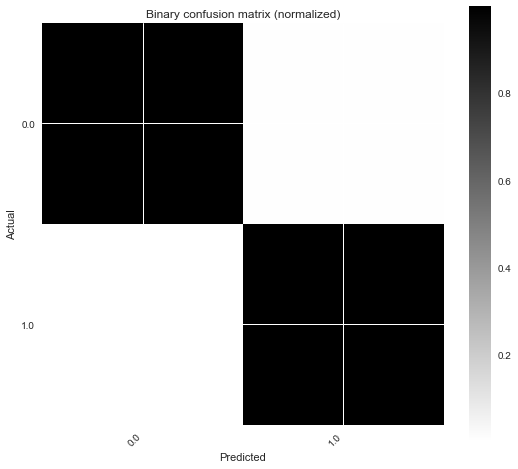

population: 187648
P: 93873
N: 93775
PositiveTest: 94373
NegativeTest: 93275
TP: 93801
TN: 93203
FP: 572
FN: 72
TPR: 0.999233006296
TNR: 0.993900293255
PPV: 0.993938944401
NPV: 0.999228088984
FPR: 0.00609970674487
FDR: 0.00606105559853
FNR: 0.00076699370426
ACC: 0.996568042292
F1_score: 0.996578944573
MCC: 4.54368327834
informedness: 0.993133299551
markedness: 0.993167033386
prevalence: 0.500261127217
LRP: 163.816564974
LRN: 0.000771700853159
DOR: 212279.880609
FOR: 0.000771911015813


c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:304: RuntimeWarning: overflow encountered in longlong_scalars
  (self.TN + self.FP) * (self.TN + self.FN)))


In [21]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()